## Task: Car Price Prediction 

### Objective:
The primary objective is to accurately predict the market price of a car based on its attributes like price, fuel efficiency, and resale value based on input features.

### Project Overview
The project aims to develop a predictive model for estimating car prices based on various attributes. It involves preparing the dataset, conducting exploratory data analysis (EDA), performing feature engineering, and building the model. The model's performance is then evaluated using appropriate metrics. The expected outcome is an effective model that helps consumers and dealers make informed pricing decisions.

### Tools Preparation and Libraries:

In [349]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [292]:
# Load the data set
data = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


 ### Exploratory Data Analysis

In [293]:
# Overview of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [294]:
# Check the data types
data.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [295]:
# Target value selling_price 
data['selling_price'].value_counts()

selling_price
300000     162
250000     125
350000     122
550000     107
600000     103
          ... 
2100000      1
828999       1
1119000      1
746000       1
865000       1
Name: count, Length: 445, dtype: int64

In [296]:
# Check the missing value 
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

* Dataset is complete with no missing entries for any of the features or the target variable.

In [297]:
# Summary of descriptive statistics for the columns
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


* Most cars are from around 2013-2016, there are significant variations in selling prices and mileage. 

In [298]:
# checking the distribution of catagorical data
print(data.fuel.value_counts())
print(data.seller_type.value_counts())
print(data.transmission.value_counts())
print(data.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


### Feature Engineering

In [299]:
# encoding 'fuel' column
data.replace({'fuel':{'Petrol':0, 'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
data.replace({'seller_type':{'Individual':0, 'Dealer':1,'Trustmark Dealer':2}},inplace=True)
data.replace({'transmission':{'Manual':0, 'Automatic':1}},inplace=True)
data.replace({'owner':{'First Owner':0, 'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [300]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [301]:
# Drop unnecessary columns (example: name since it's not numeric)
data.drop(['name'], axis=1, inplace=True)

### Data Visualization

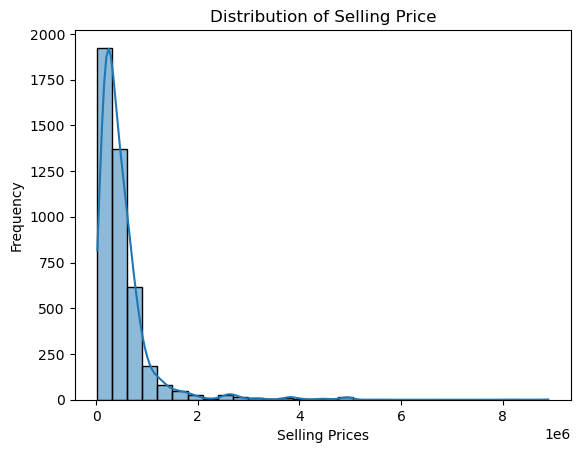

In [302]:
# Visualize the distribution of selling price(target variabel)
sns.histplot(data['selling_price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Prices')
plt.ylabel('Frequency')
plt.show()

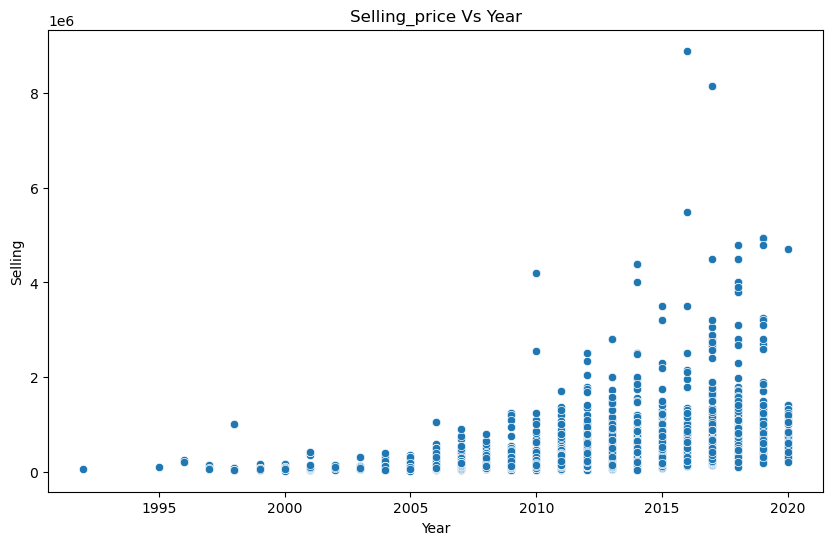

In [303]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='year',y='selling_price', data=data)
plt.title('Selling_price Vs Year')
plt.xlabel('Year')
plt.ylabel('Selling');

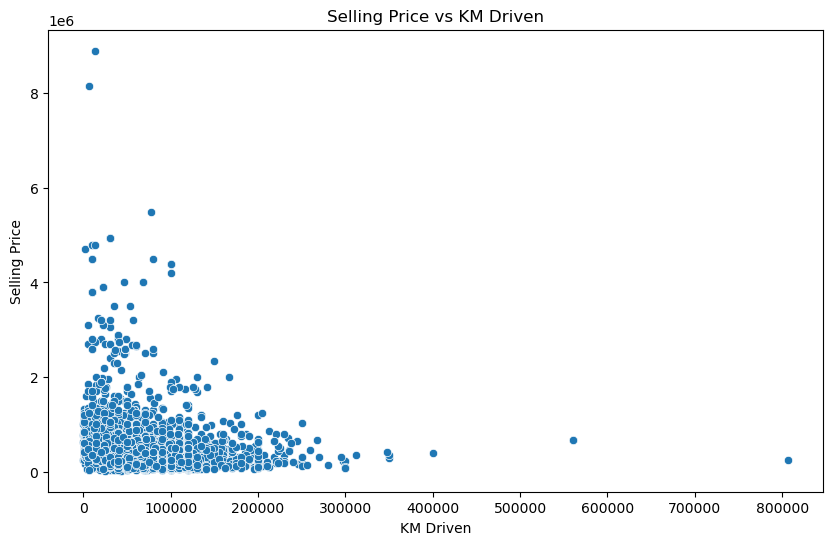

In [304]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='km_driven', y='selling_price', data=data)
plt.title('Selling Price vs KM Driven')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()


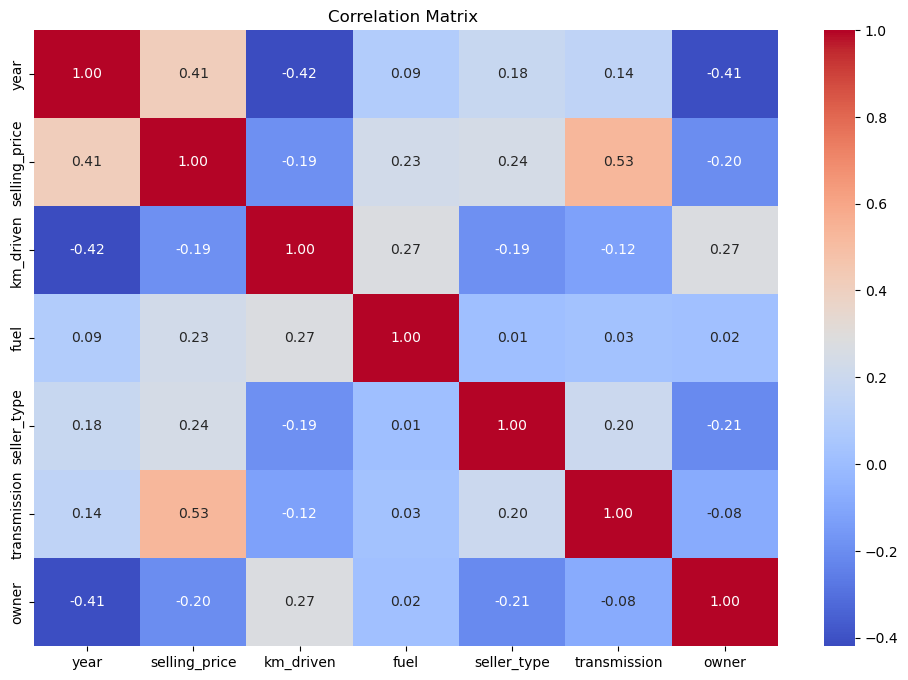

In [305]:
cor_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix ')
plt.show()

* The key drivers of car prices are the car's year, fuel type, transmission, and the number of kilometers driven. Newer diesel cars with automatic transmission are likely to fetch higher prices, while older cars with higher mileage, especially those with manual transmission, tend to have lower prices.

## Model Building

In [335]:
# Split the dataset into features (X) and target (y)
X = data.drop('selling_price',axis=1)
y = data['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train a Linear Regression model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

## Model Evaluation

In [343]:
# Make predictions
y_pred = rf_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

from sklearn import metrics
print('R-2', metrics.r2_score(y_test,y_pred))
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

R-2 0.7101797396041623
Mean Absolute Error: 157251.0323587778
Root Mean Squared Error: 306888.35414693994


In [345]:
print('Train score')
rf_reg.score(X_train,y_train)

Train score


0.9127858818643727

* Collectively, lower values of MAE and RMSE, alongside a higher R², indicate a better fit of the model to the data, suggesting that our linear regression model is performing reasonably well

### Comparing Actual vs Predicted:

In [346]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
data 

,Actual,Predicted
1149,625000,3.804774e+05
2245,520000,5.200000e+05
4261,115999,9.918318e+04
2865,2000000,1.738500e+06
3110,707000,8.310750e+05
...,...,...
2168,100000,2.257800e+05
3783,650000,1.940800e+05
1683,430000,7.428151e+05
2420,100000,2.781812e+05


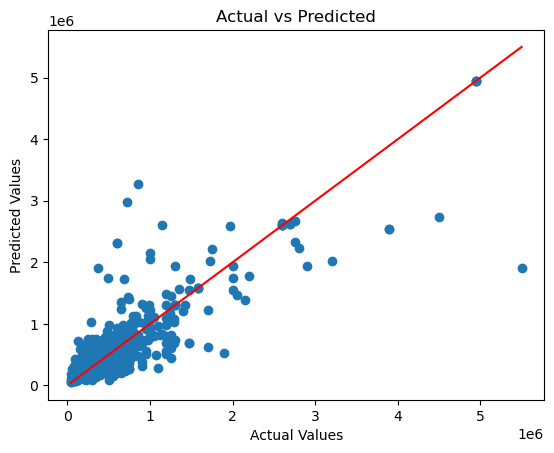

In [348]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()